### Import libraries

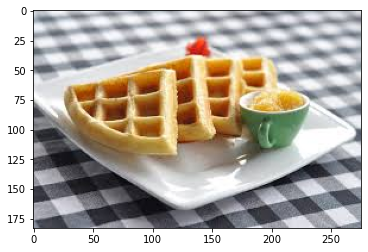

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('D:\ComputerVision\images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect conrners

(183, 276)


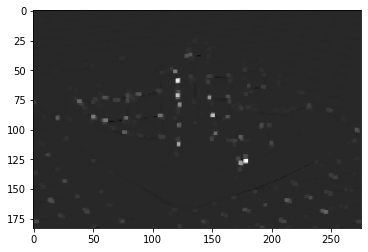

In [12]:
#convert the copy_image to gray scale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

#the Harris Corner Detection takes in float32 data
gray = np.float32(gray)

#detect corners
# 2: 2x2 pixel square 
# 3: size of sobel operator, 3 is the typical kernel size
# 0.04: a constant value to determine which point is considered as corner(typical = 0.04)
dc = cv2.cornerHarris(gray, 2, 3, 0.04)

#dilate the corner point to see more clearly
dc = cv2.dilate(dc, None)

plt.imshow(dc, cmap ='gray')

print(dc.shape)

### Select and display strong corners

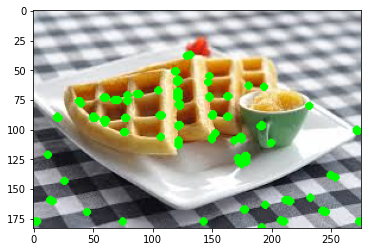

In [34]:
#difine a threshold for extracting strong corners, it depends on the image
threshold = 0.09 * dc.max()

#creat an image copy to draw corners on
corner_image = np.copy(image_copy)

#iterate through all the corners and draw them on the image(if they pass the threshold)
for j in range(0, dc.shape[0]):
    for i in range(0, dc.shape[1]):
        if(dc[j][i] > threshold):
            cv2.circle(corner_image, (i,j), 2, (0,255,0), 1)

plt.imshow(corner_image)

## Practice

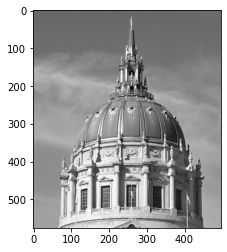

In [28]:
image2 = cv2.imread('D:/ComputerVision/images/city_hall_zoom.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2_copy = np.copy(image2)
image2_copy = cv2.cvtColor(image2_copy, cv2.COLOR_RGB2GRAY)
plt.imshow(image2_copy, cmap='gray') 

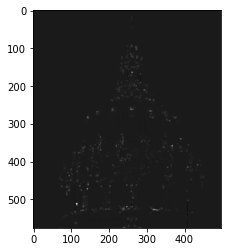

In [30]:
image2_copy = np.float32(image2_copy)
dst = cv2.cornerHarris(image2_copy, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
plt.imshow(dst, cmap='gray')

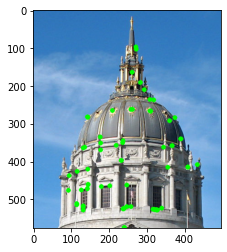

In [46]:
threshold2 = 0.2*dst.max()
corner_image2 = np.copy(image2)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if dst[j][i] > threshold2:
            cv2.circle(corner_image2, (i,j), 2,(0,255,0), 5)

plt.imshow(corner_image2)